# Chapter 1 ニューラルネットワークの復習


In [1]:
'''
1. 数学とPythonの復習
1. ニューラルネットワークの推論
1. ニューラルネットワークの学習
1. ニューラルネットワークで問題を解く
1. 計算の高速化
1. まとめ
'''


'\n1. 数学と\x08\x08Pythonの復習\n1. ニューラルネットワークの推論\n1. ニューラルネットワークの学習\n1. ニューラルネットワークで問題を解く\n1. 計算の高速化\n1. \x08まとめ\n'

# 2レイヤネットの実装


In [2]:
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [3]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)


[[0.00511722 0.00401185 0.00145658]
 [0.00514797 0.00415487 0.0017015 ]
 [0.00512494 0.00398843 0.00152765]
 [0.00513827 0.00409527 0.0016266 ]
 [0.00513145 0.00405272 0.00157403]
 [0.00513147 0.00397578 0.00158654]
 [0.00512822 0.00400827 0.00155303]
 [0.00511444 0.0038208  0.00146303]
 [0.00512573 0.0040172  0.00152987]
 [0.005155   0.00412185 0.00176804]]


# MatMulレイヤの実装


In [4]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


# Affineレイヤの実装


In [5]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx


# Softmax with lossレイヤの実装


In [6]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


# spiralデータセット


In [7]:
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
from dataset import spiral
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)  # (300, 3)

# データ点のプロット
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


x (300, 2)
t (300, 3)


# 2層ニューラルネットワーク


In [8]:

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

| epoch 96 |  iter 10 / 10 | loss 0.52
| epoch 97 |  iter 10 / 10 | loss 0.51
| epoch 98 |  iter 10 / 10 | loss 0.50
| epoch 99 |  iter 10 / 10 | loss 0.48
| epoch 100 |  iter 10 / 10 | loss 0.48
| epoch 101 |  iter 10 / 10 | loss 0.46
| epoch 102 |  iter 10 / 10 | loss 0.45
| epoch 103 |  iter 10 / 10 | loss 0.45
| epoch 104 |  iter 10 / 10 | loss 0.44
| epoch 105 |  iter 10 / 10 | loss 0.44
| epoch 106 |  iter 10 / 10 | loss 0.41
| epoch 107 |  iter 10 / 10 | loss 0.40
| epoch 108 |  iter 10 / 10 | loss 0.41
| epoch 109 |  iter 10 / 10 | loss 0.40
| epoch 110 |  iter 10 / 10 | loss 0.40
| epoch 111 |  iter 10 / 10 | loss 0.38
| epoch 112 |  iter 10 / 10 | loss 0.38
| epoch 113 |  iter 10 / 10 | loss 0.36
| epoch 114 |  iter 10 / 10 | loss 0.37
| epoch 115 |  iter 10 / 10 | loss 0.35
| epoch 116 |  iter 10 / 10 | loss 0.34
| epoch 117 |  iter 10 / 10 | loss 0.34
| epoch 118 |  iter 10 / 10 | loss 0.34
| epoch 119 |  iter 10 / 10 | loss 0.33
| epoch 120 |  iter 10 / 10 | loss 0.34
| ep

| epoch 201 |  iter 10 / 10 | loss 0.15
| epoch 202 |  iter 10 / 10 | loss 0.16
| epoch 203 |  iter 10 / 10 | loss 0.16
| epoch 204 |  iter 10 / 10 | loss 0.15
| epoch 205 |  iter 10 / 10 | loss 0.16
| epoch 206 |  iter 10 / 10 | loss 0.15
| epoch 207 |  iter 10 / 10 | loss 0.15
| epoch 208 |  iter 10 / 10 | loss 0.15
| epoch 209 |  iter 10 / 10 | loss 0.15
| epoch 210 |  iter 10 / 10 | loss 0.15
| epoch 211 |  iter 10 / 10 | loss 0.15
| epoch 212 |  iter 10 / 10 | loss 0.15
| epoch 213 |  iter 10 / 10 | loss 0.15
| epoch 214 |  iter 10 / 10 | loss 0.15
| epoch 215 |  iter 10 / 10 | loss 0.15
| epoch 216 |  iter 10 / 10 | loss 0.14
| epoch 217 |  iter 10 / 10 | loss 0.14
| epoch 218 |  iter 10 / 10 | loss 0.15
| epoch 219 |  iter 10 / 10 | loss 0.14
| epoch 220 |  iter 10 / 10 | loss 0.14
| epoch 221 |  iter 10 / 10 | loss 0.14
| epoch 222 |  iter 10 / 10 | loss 0.14
| epoch 223 |  iter 10 / 10 | loss 0.14
| epoch 224 |  iter 10 / 10 | loss 0.14
| epoch 225 |  iter 10 / 10 | loss 0.14


| epoch 286 |  iter 10 / 10 | loss 0.11
| epoch 287 |  iter 10 / 10 | loss 0.11
| epoch 288 |  iter 10 / 10 | loss 0.12
| epoch 289 |  iter 10 / 10 | loss 0.11
| epoch 290 |  iter 10 / 10 | loss 0.11
| epoch 291 |  iter 10 / 10 | loss 0.11
| epoch 292 |  iter 10 / 10 | loss 0.11
| epoch 293 |  iter 10 / 10 | loss 0.11
| epoch 294 |  iter 10 / 10 | loss 0.11
| epoch 295 |  iter 10 / 10 | loss 0.12
| epoch 296 |  iter 10 / 10 | loss 0.11
| epoch 297 |  iter 10 / 10 | loss 0.12
| epoch 298 |  iter 10 / 10 | loss 0.11
| epoch 299 |  iter 10 / 10 | loss 0.11
| epoch 300 |  iter 10 / 10 | loss 0.11


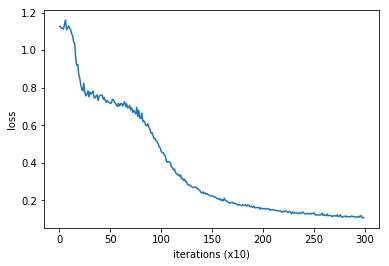

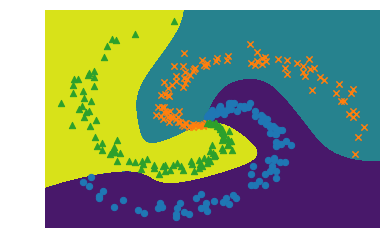

In [9]:
# coding: utf-8
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import SGD
from common.functions import softmax, cross_entropy_error
from dataset import spiral
import matplotlib.pyplot as plt


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

